## gerekli kütüphaneleri ekliyoruz

In [322]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## verimizi okuduk

In [323]:
df = pd.read_csv("insurance.csv")

In [324]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [325]:
## boş değerler var mı diye kontrol ettim

In [326]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [327]:
## kaç tane eşsiz değer var diye baktım

In [328]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [329]:
df["bmi"]

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

In [330]:
## bmi kolonunun dağılımını çizdirdim

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

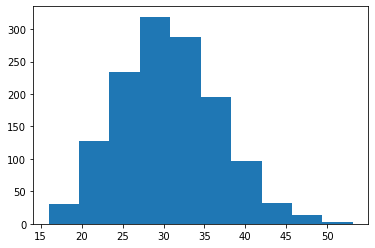

In [331]:
plt.hist(df["bmi"])

In [332]:
## sigara içenlerin oranlarını grafikle çizdirdim

<AxesSubplot:>

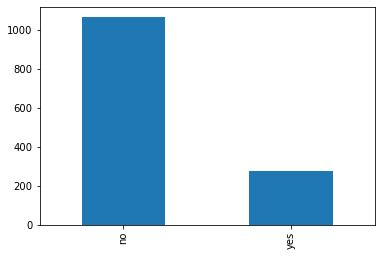

In [333]:
df["smoker"].value_counts().plot(kind="bar")

In [334]:
## sigara içenlerin ve içmeyenlerin sağlık harcamalarının ortalamalarını gösterdim

In [335]:
df[df["smoker"]=="no"]["charges"].mean()

8434.268297856199

In [336]:
df[df["smoker"]=="yes"]["charges"].mean()

32050.23183153285

In [337]:
## bölgelerin dağılımını inceledik grafik olarak çizdirdik

<AxesSubplot:>

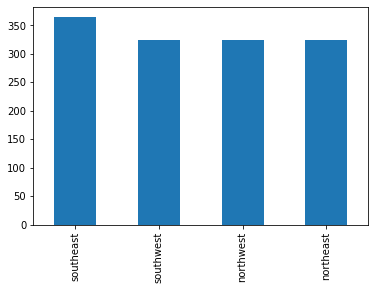

In [338]:
df["region"].value_counts().plot(kind="bar")

In [339]:
## sigara içenlerin ve içmeyenlerin bölgere göre sayılarını listeleyip grafiklerini çizdirdim

In [340]:
smoker_region_df = pd.DataFrame(df[df["smoker"]=="yes"]["region"])

In [341]:
no_smoker_region_df = pd.DataFrame(df[df["smoker"]=="no"]["region"])

In [342]:
smoker_region_df

,region
0,southwest
11,southeast
14,southeast
19,southwest
23,northeast
...,...
1313,southwest
1314,northwest
1321,northeast
1323,southeast


In [343]:
no_smoker_region_df

,region
1,southeast
2,southeast
3,northwest
4,northwest
5,southeast
...,...
1332,southwest
1333,northwest
1334,northeast
1335,southeast


<AxesSubplot:>

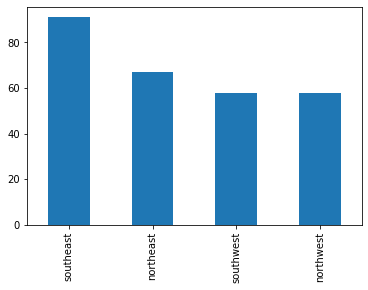

In [344]:
smoker_region_df["region"].value_counts().plot(kind="bar")

<AxesSubplot:>

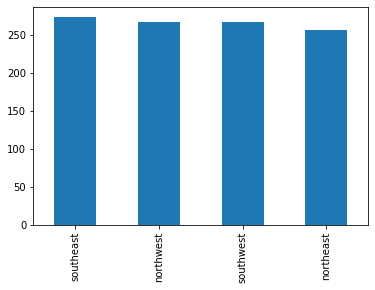

In [345]:
no_smoker_region_df["region"].value_counts().plot(kind="bar")

In [346]:
## kadın ve erkeklerin bmi oranlarını ayrı ayrı grafiğe yazdırdım

In [347]:
female_bmi_df = pd.DataFrame(df[df["sex"]=="female"]["bmi"])

In [348]:
male_bmi_df = pd.DataFrame(df[df["sex"]=="male"]["bmi"])

(array([ 19.,  54.,  95., 132., 126.,  98.,  75.,  40.,  15.,   8.]),
 array([16.815 , 19.9405, 23.066 , 26.1915, 29.317 , 32.4425, 35.568 ,
        38.6935, 41.819 , 44.9445, 48.07  ]),
 <BarContainer object of 10 artists>)

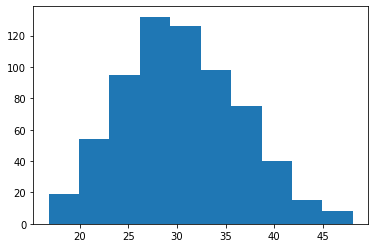

In [349]:
plt.hist(female_bmi_df)

(array([ 13.,  59., 115., 159., 153., 101.,  48.,  18.,   7.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

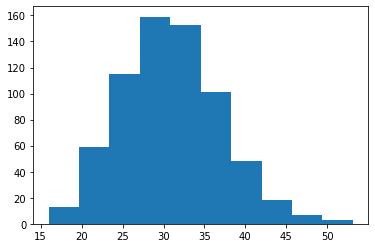

In [350]:
plt.hist(male_bmi_df)

In [351]:
## hangi bölgede en fazla çocuk sayısı var onu bulmak istedik, önce bir kişinin en fazla kaç çocuğu var ona baktık 

In [352]:
df["children"].sort_values(ascending = False)

1272    5
1130    5
1116    5
568     5
1245    5
       ..
618     0
619     0
623     0
624     0
1337    0
Name: children, Length: 1338, dtype: int64

In [353]:
df.iloc[1272]

age                  43
sex                male
bmi               25.52
children              5
smoker               no
region        southeast
charges     14478.33015
Name: 1272, dtype: object

In [354]:
southwest_children_df = pd.DataFrame(df[df["region"]=="southwest"]["children"])

In [355]:
southwest_children_df["children"].sum()

371

(array([138.,   0.,  78.,   0.,  57.,   0.,  37.,   0.,   7.,   8.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

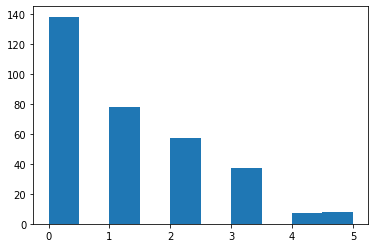

In [356]:
plt.hist(southwest_children_df)

In [357]:
northwest_children_df = pd.DataFrame(df[df["region"]=="northwest"]["children"])

In [358]:
northwest_children_df["children"].sum()

373

(array([132.,   0.,  74.,   0.,  66.,   0.,  46.,   0.,   6.,   1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

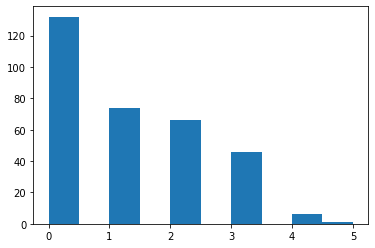

In [359]:
plt.hist(northwest_children_df)

In [360]:
southeast_children_df = pd.DataFrame(df[df["region"]=="southeast"]["children"])

In [361]:
## en fazla çocuk sayısı güneydoğu bölgesinde çıktı

In [362]:
southeast_children_df["children"].sum()

382

In [363]:
## bu bölgedeki çocuk sayılarının kaçar tane olduklarının dağılım grafiğini çizdirdim

(array([157.,   0.,  95.,   0.,  66.,   0.,  35.,   0.,   5.,   6.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

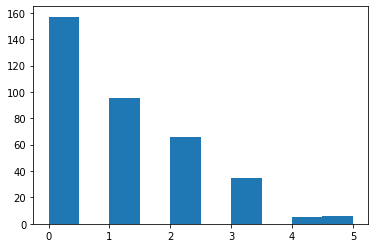

In [364]:
plt.hist(southeast_children_df)

In [365]:
northeast_children_df = pd.DataFrame(df[df["region"]=="northeast"]["children"])

In [366]:
northeast_children_df["children"].sum()

339

(array([147.,   0.,  77.,   0.,  51.,   0.,  39.,   0.,   7.,   3.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

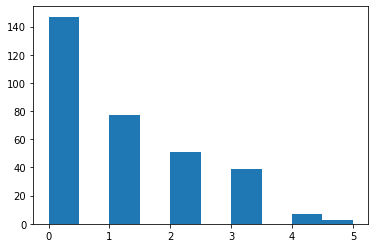

In [367]:
plt.hist(northeast_children_df)

In [368]:
## yaş oranlarının bmi etkileşinin incelemek istedim fakat çok fazla yaş olduğu için gruplayarak ilerledim ve bunları listeledim

In [369]:
df["age"].sort_values(ascending = False)

335     64
603     64
752     64
1265    64
534     64
        ..
942     18
46      18
295     18
50      18
648     18
Name: age, Length: 1338, dtype: int64

In [370]:
## ve bunların grafiklerini sayılarını görsel olarak görmek için çizdirdim

(array([ 9., 39., 53., 74., 61., 39., 22.,  6.,  0.,  3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

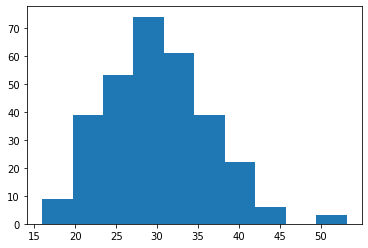

In [371]:
plt.hist(pd.DataFrame(df.query("age >= 18 and age <= 25")["bmi"]))

(array([11., 18., 30., 32., 48., 30., 24., 12.,  7.,  5.]),
 array([17.195 , 20.1285, 23.062 , 25.9955, 28.929 , 31.8625, 34.796 ,
        37.7295, 40.663 , 43.5965, 46.53  ]),
 <BarContainer object of 10 artists>)

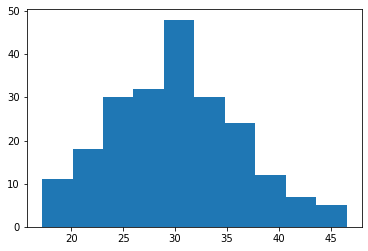

In [372]:
plt.hist(pd.DataFrame(df.query("age >= 26 and age <= 33")["bmi"]))

(array([ 9., 14., 21., 44., 41., 39., 18.,  9.,  7.,  3.]),
 array([16.815 , 19.8935, 22.972 , 26.0505, 29.129 , 32.2075, 35.286 ,
        38.3645, 41.443 , 44.5215, 47.6   ]),
 <BarContainer object of 10 artists>)

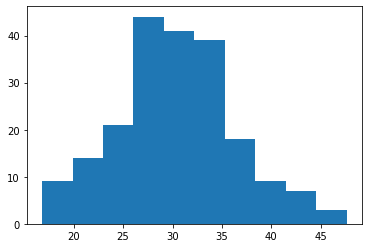

In [373]:
plt.hist(pd.DataFrame(df.query("age >= 34 and age <= 41")["bmi"]))

(array([11., 25., 48., 40., 33., 31., 18., 11.,  4.,  4.]),
 array([19.19 , 22.078, 24.966, 27.854, 30.742, 33.63 , 36.518, 39.406,
        42.294, 45.182, 48.07 ]),
 <BarContainer object of 10 artists>)

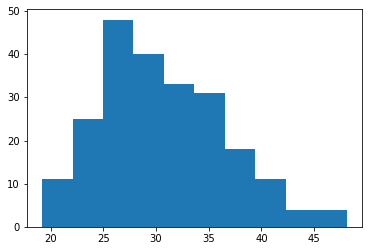

In [374]:
plt.hist(pd.DataFrame(df.query("age >= 42 and age <= 49")["bmi"]))

(array([ 8., 17., 32., 32., 47., 30., 28., 15.,  7.,  5.]),
 array([18.05 , 21.019, 23.988, 26.957, 29.926, 32.895, 35.864, 38.833,
        41.802, 44.771, 47.74 ]),
 <BarContainer object of 10 artists>)

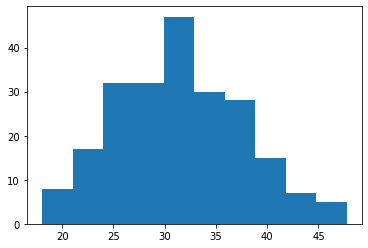

In [375]:
plt.hist(pd.DataFrame(df.query("age >= 50 and age <= 57")["bmi"]))

(array([ 3., 13., 27., 24., 36., 25., 25.,  8.,  2.,  1.]),
 array([18.335 , 21.4075, 24.48  , 27.5525, 30.625 , 33.6975, 36.77  ,
        39.8425, 42.915 , 45.9875, 49.06  ]),
 <BarContainer object of 10 artists>)

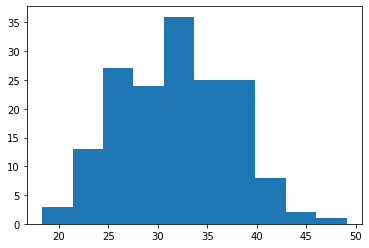

In [376]:
plt.hist(pd.DataFrame(df.query("age >= 58 and age <= 64")["bmi"]))

In [377]:
## burada da yine aynı şekilde çocuk sayısının bmi üzerinde etkisini görmek incelemek için her yaş için ayrı ayrı grafik
## çizdirip inceledim

(array([ 12.,  62., 100., 135., 119.,  80.,  53.,   9.,   3.,   1.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

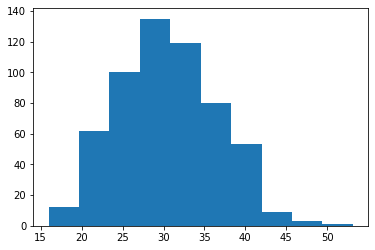

In [378]:
plt.hist(pd.DataFrame(df[df["children"]==0]["bmi"]))

(array([12., 27., 63., 78., 66., 46., 17.,  9.,  4.,  2.]),
 array([16.815 , 20.3915, 23.968 , 27.5445, 31.121 , 34.6975, 38.274 ,
        41.8505, 45.427 , 49.0035, 52.58  ]),
 <BarContainer object of 10 artists>)

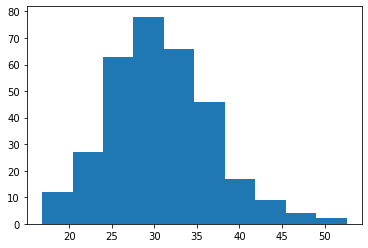

In [379]:
plt.hist(pd.DataFrame(df[df["children"]==1]["bmi"]))

(array([ 8., 17., 39., 28., 51., 38., 37.,  8.,  7.,  7.]),
 array([16.815 , 19.9405, 23.066 , 26.1915, 29.317 , 32.4425, 35.568 ,
        38.6935, 41.819 , 44.9445, 48.07  ]),
 <BarContainer object of 10 artists>)

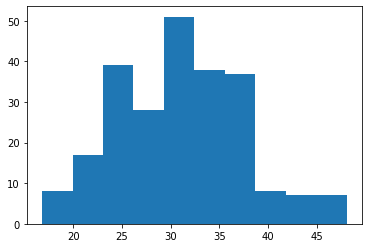

In [380]:
plt.hist(pd.DataFrame(df[df["children"]==2]["bmi"]))

(array([10., 16., 13., 30., 34., 21., 17.,  9.,  4.,  3.]),
 array([18.905 , 21.6675, 24.43  , 27.1925, 29.955 , 32.7175, 35.48  ,
        38.2425, 41.005 , 43.7675, 46.53  ]),
 <BarContainer object of 10 artists>)

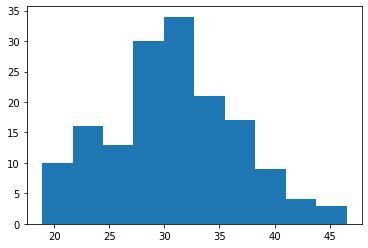

In [381]:
plt.hist(pd.DataFrame(df[df["children"]==3]["bmi"]))

(array([3., 1., 7., 3., 1., 6., 1., 0., 1., 2.]),
 array([24.415 , 26.1205, 27.826 , 29.5315, 31.237 , 32.9425, 34.648 ,
        36.3535, 38.059 , 39.7645, 41.47  ]),
 <BarContainer object of 10 artists>)

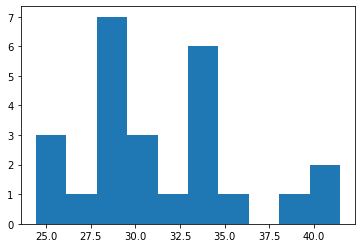

In [382]:
plt.hist(pd.DataFrame(df[df["children"]==4]["bmi"]))

(array([1., 2., 5., 3., 2., 2., 1., 0., 1., 1.]),
 array([18.3  , 21.145, 23.99 , 26.835, 29.68 , 32.525, 35.37 , 38.215,
        41.06 , 43.905, 46.75 ]),
 <BarContainer object of 10 artists>)

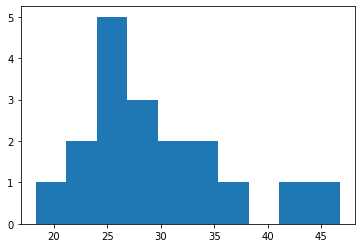

In [383]:
plt.hist(pd.DataFrame(df[df["children"]==5]["bmi"]))

In [384]:
## burada da bmi ile yapaılan harcamaların ilişkilerini incelemek istedim önce bmi değerlerini sıraladım min max değerlerini görmek için 
## yine çok fazla bmi değeri olduğundan bir gruplama yaptım ve bu gruplara göre listeleyip grafikleştirdim 

In [385]:
df["bmi"].sort_values()

172     15.960
428     16.815
1226    16.815
412     17.195
1286    17.290
         ...  
286     48.070
116     49.060
847     50.380
1047    52.580
1317    53.130
Name: bmi, Length: 1338, dtype: float64

(array([70., 43., 39., 34., 17., 16., 17.,  8.,  1.,  2.]),
 array([ 1121.8739  ,  4516.623962,  7911.374024, 11306.124086,
        14700.874148, 18095.62421 , 21490.374272, 24885.124334,
        28279.874396, 31674.624458, 35069.37452 ]),
 <BarContainer object of 10 artists>)

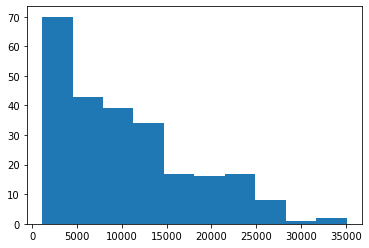

In [386]:
plt.hist(pd.DataFrame(df.query("bmi >= 15 and bmi <= 25")["charges"]))

(array([306., 226.,  70.,  43.,  23.,  43.,  35.,  14.,   2.,   2.]),
 array([ 1131.5066  ,  7277.643249, 13423.779898, 19569.916547,
        25716.053196, 31862.189845, 38008.326494, 44154.463143,
        50300.599792, 56446.736441, 62592.87309 ]),
 <BarContainer object of 10 artists>)

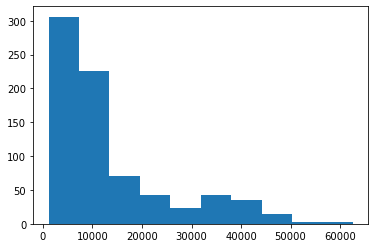

In [387]:
plt.hist(pd.DataFrame(df.query("bmi >= 26 and bmi <= 36")["charges"]))

(array([68., 56., 24.,  6.,  3.,  2., 13., 13.,  9.,  1.]),
 array([ 1141.4451  ,  6884.408038, 12627.370976, 18370.333914,
        24113.296852, 29856.25979 , 35599.222728, 41342.185666,
        47085.148604, 52828.111542, 58571.07448 ]),
 <BarContainer object of 10 artists>)

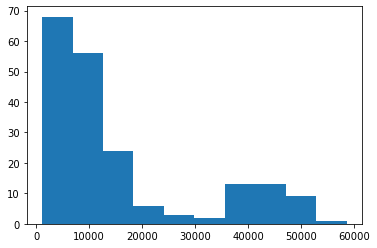

In [388]:
plt.hist(pd.DataFrame(df.query("bmi >= 37 and bmi <= 47")["charges"]))

(array([2., 1., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 1163.4627 ,  5497.25625,  9831.0498 , 14164.84335, 18498.6369 ,
        22832.43045, 27166.224  , 31500.01755, 35833.8111 , 40167.60465,
        44501.3982 ]),
 <BarContainer object of 10 artists>)

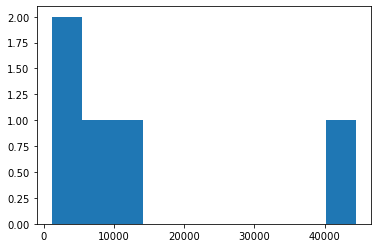

In [389]:
plt.hist(pd.DataFrame(df.query("bmi >= 48 and bmi <= 54")["charges"]))

In [390]:
## bmi kolonu için outlier veri var mı yani aykırı veri onu incelemek istedik ve var olduğunu gördük 

{'whiskers': [<matplotlib.lines.Line2D at 0x1c6deb679d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c6deb67f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c6deb67700>],
 'medians': [<matplotlib.lines.Line2D at 0x1c6deb78550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c6deb78820>],
 'means': []}

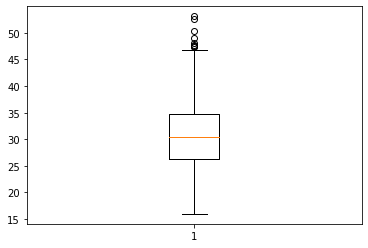

In [391]:
plt.boxplot(df["bmi"])

In [392]:
## bu outlier veriler 45 - 46 arasından başladığını görüyoruz ve bu bmi değerlerini arayıp bu çıkan sonuçları verimizden silelim

In [393]:
## bmi değeri 45.5 altında olanları alarak outlier verileri silmiş olduk ve yeni verimizi elde ettik

In [394]:
outlier_data = df[df["bmi"]<45.5]

In [395]:
df[df["bmi"]>45.5]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
292,25,male,45.54,2,yes,southeast,42112.23560
401,47,male,47.52,1,no,southeast,8083.91980
438,52,female,46.75,5,no,southeast,12592.53450
454,32,male,46.53,2,no,southeast,4686.38870
543,54,female,47.41,0,yes,southeast,63770.42801
547,54,female,46.70,2,no,southwest,11538.42100
549,43,female,46.20,0,yes,southeast,45863.20500
660,37,male,46.53,3,no,southeast,6435.62370


In [396]:
outlier_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [397]:
## görüldüğü üzere artık outlier verimiz bulunmamakta

{'whiskers': [<matplotlib.lines.Line2D at 0x1c6debd6ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c6debe54c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c6debd6c10>],
 'medians': [<matplotlib.lines.Line2D at 0x1c6debe5a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c6debe5d60>],
 'means': []}

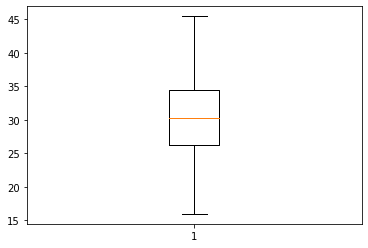

In [398]:
plt.boxplot(outlier_data["bmi"])


In [399]:
df = outlier_data

In [400]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [401]:
## sigara içip içmeyenlere ve bölgelere göre bmi sayılarını görmek istedim bar plot yardımı ile grafiğimizi çizdirdim

<AxesSubplot:xlabel='region', ylabel='bmi'>

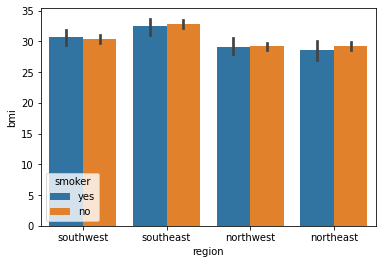

In [402]:
sns.barplot(x="region", y="bmi", hue="smoker", data=df)

In [403]:
## verimizde kategorik değişkenler olduğu için bu şekilde öğrenirse makinemiz yanlış sonuçlar verir,
## bu yüzden OneHotEncoder işlemi yaparak verimizi tamamıyla sayısal değişken haline getirdik artık eğitime hazırız

In [404]:
from sklearn.preprocessing import OneHotEncoder

new_smoker_col = pd.get_dummies(df["smoker"])
df = df.join(new_smoker_col)
df.drop(["smoker"],axis = 1,inplace = True)

new_sex_col = pd.get_dummies(df["sex"])
df = df.join(new_sex_col)
df.drop(["sex"],axis = 1,inplace = True)

new_region_col = pd.get_dummies(df["region"])
df = df.join(new_region_col)
df.drop(["region"],axis = 1,inplace = True)


In [405]:
## eğitim ve test verimizi ayarlıyoruz

In [406]:
X = df.drop(["charges"],axis=1)
Y = df["charges"]

In [407]:
## verimizi scale ediyoruz normalize ettik 

In [408]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [409]:
## verimizi train ve test olarak ayırdık 

In [410]:
from sklearn.model_selection import train_test_split,KFold

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=34)
print("X_train",len(x_train))
print("X_test",len(x_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 1056
X_test 264
y_train 1056
y_test 264


In [411]:
## ben DecisionTreeRegressor ve LinearRegression algoritmalarını kullandım en iyi sonucu DecisionTreeRegressor algoritmasının
## verdiğini gördük uygulayalım ve modellerimiz eğitim sonuçlara bakalim

In [412]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
dtree = DecisionTreeRegressor(max_depth = 4, random_state=42)
dtree.fit(X_train, y_train)

acc_log_train = round(dtree.score(X_train, y_train)*100,2) 
acc_log_test = round(dtree.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

mae = mean_absolute_error(dtree.predict(X_test), y_test)
mse = mean_squared_error(dtree.predict(X_test), y_test)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)



Training Accuracy: % 87.16
Testing Accuracy: % 82.95
Mean Absolute Error (MAE): 2794.05
Mean Squared Error (MSE): 23410541.59
Root Mean Squared Error (RMSE): 4838.44


In [413]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
acc_log_train = round(linreg.score(X_train, y_train)*100,2) 
acc_log_test = round(linreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))


mae = mean_absolute_error(linreg.predict(x_test), y_test)
mse = mean_squared_error(linreg.predict(x_test), y_test)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Training Accuracy: % 75.4
Testing Accuracy: % 72.77
Mean Absolute Error (MAE): 10954.33
Mean Squared Error (MSE): 230817211.93
Root Mean Squared Error (RMSE): 15192.67


In [414]:
## 82.95 lik bir doğruluk oranı elde ettik teşekkürler :)